In [64]:
import spacy

nlp = spacy.load("nl_core_news_lg")


### Importing spaCy and loading texts and annotations

In [65]:

from tqdm import tqdm

import gzip
import os

import random

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

corpus = "./Corpus/"
anns = "./Annotations/"

def load(file, corpus, lines=False):
    with open(os.path.join(corpus, file), "r") as handle:
        if lines:
            return list(handle) # handle.readlines()
        else:
            return handle.read()

### Using csv to read BRAT annotations

In [66]:

def read_csv(file, corpus=anns):
    file = load(file, corpus, lines=True)

    for i, line in enumerate(file):
        if i == 0: print("first line:", line) #to see brat format
        tab_cols = line.split("\t")
        
        if tab_cols[0].startswith("T"):
            last = tab_cols[-1].strip()
            first = tab_cols[0]
            
            middle = tab_cols[1].split()
#             print(middle, middle[0], middle[-1])
            middle = [middle[0], middle[1], middle[-1]]
            
            yield (first, *middle, last)
            
def filter_rows(rows):
    for r in rows:
        if r[1].upper() in ["WOMEN", "INDIGENOUS", "MEN"]:
        #if r[1].upper() in ["PERSON", "ORG", "GPE", "WOMEN", "INDIGENOUS", "MEN"]:
            yield r
        
def change_rows(rows):
    for r in rows:
        entity_nr, entity_type, start, end, label = r
        yield int(start), int(end), entity_type.upper(), label


In [67]:
data = {}

for ann_f in os.listdir(anns):
    if len(load(ann_f, anns)) > 0:
        cur_name = ann_f.strip(".ann")
    
        txt_f = cur_name + ".txt"
        if os.path.isfile(os.path.join(corpus, txt_f)):
        
            #raw_text = load(txt_f, corpus)
            brat_entity_list = list(change_rows(filter_rows(read_csv(ann_f, anns))))
            
            data[txt_f] = (brat_entity_list)
        else:
            print("no file", txt_f)
    else:
        print("annotation file empty")

first line: T1	Person 528 546	Abraham Salbindusz

first line: T1	Group 59 63	volk

first line: T1	Women 122 128	dogter

first line: T1	Organization 2613 2626	weesmeesteren

first line: T1	Women 590 596	moeden

first line: T1	Women 139 145	moeder

first line: T1	GPE 142 149	Batavia

first line: T1	Number 202 206	twee

first line: T1	GPE 757 764	batavia

first line: T1	Organization 200 222	gereformeerde diaconie

first line: T1	Person 83 98	Benjamin Heynen

first line: T1	Person 90 105	Benjamin Heynen

first line: T1	GPE 1591 1598	Malacca

first line: T1	Person 268 275;276 284	Abraham Salomons

first line: T1	Person 631 655;656 668	Ian Carelszen Zaelitbra„ „ham Simanoz

first line: T1	Person 74 101	Christiaan Perdinant Cramer

first line: T1	Organization 427 436	Weeskamer

first line: T1	Person 88 106	M: Egbert Blomhert

first line: T1	Person 131 145	Leendert Rolff

first line: T1	Person 2 26	George Daniel

first line: T1	Person 0 11	Jan Molleer

first line: T1	Men 306 309	M:r

first lin

In [68]:
data

{'NL-HaNA_1.04.02_6847_0758.txt': [(1005, 1009, 'MEN', 'Heer'),
  (1207, 1217, 'WOMEN', 'huifsvrouw'),
  (1218, 1223, 'WOMEN', 'mejuf'),
  (1182, 1186, 'MEN', 'Heer')],
 'NL-HaNA_1.04.02_6847_0016.txt': [(830, 833, 'MEN', 'm:r'),
  (1791, 1800, 'WOMEN', 'Erfgename'),
  (1824, 1830, 'INDIGENOUS', 'slaaff'),
  (1844, 1852, 'INDIGENOUS', 'Slavinne'),
  (1844, 1852, 'WOMEN', 'Slavinne'),
  (1924, 1931, 'INDIGENOUS', 'slaeven'),
  (1936, 1940, 'WOMEN', 'haar'),
  (1973, 1977, 'WOMEN', 'haar')],
 'NL-HaNA_1.04.02_6847_0017.txt': [(122, 128, 'WOMEN', 'dogter'),
  (262, 265, 'MEN', 'hij'),
  (421, 423, 'WOMEN', 'zy'),
  (429, 434, 'WOMEN', 'haker'),
  (573, 579, 'WOMEN', 'Jnsf=m'),
  (606, 610, 'WOMEN', 'wed:'),
  (727, 730, 'MEN', 'zyn'),
  (917, 921, 'WOMEN', 'haar'),
  (1442, 1447, 'MEN', 'mons:')],
 'NL-HaNA_1.04.02_6847_0759.txt': [],
 'NL-HaNA_1.04.02_6847_0029.txt': [(590, 596, 'WOMEN', 'moeden'),
  (597, 604, 'WOMEN', 'Juff=mo'),
  (628, 633, 'WOMEN', 'wed:e'),
  (1054, 1072, 'WOMEN', 

### Terms for men, women and indigenous


In [69]:
def get_terms(data, group):
    for entity_list in data.values():
        for row in entity_list:
            if row[2] == group:
                yield row[3]
                
terms_men = set(get_terms(data, "MEN"))
terms_women = set(get_terms(data, "WOMEN"))
terms_indi = set(get_terms(data, "INDIGENOUS"))

In [70]:
print(terms_men)

{'secret„s', 'de wel Edelen Groot agtb: heeren Bewindhebberen', 'M„', 'Equipagiemeester', 'mons', 'boekhouder', 'adjunct geswore klerk', 'schipper', 'den heer', 'onderstuurman', '1„e', 'getuijgen', 'm:r', 'kooplieden', 'Eerw: heer', 'Ionge', 'agt: heeren', 'weesmeesteren', 'dE', 'de wel Edele groot agtb: heeren Bewindhebberen', 'De Heer', 'Den Welherw: Heer', 'zijner', 'neeven', 'heeren', 'Clercq', 'Ionga', 'Commissarissen', 'nots', 'baas Lootgieter', 'dE:', 'notaris publicq', 'van heeren', 'gevare secretaris,', 'Timmerman', 'klerken', 'broeder', 'schoon zoon', 'Heeren', 'scheeps Corporaal', 'Heere', 'M=l', 'Clercquen als getuijgen', 'heer', 'wager', 'voogden', 'Clercque', 'heer m:r', 'M=r', 'Edele groot agtbaeren', 'oud gouverneur', 'M„s', 'DeHeer en M=r', 'koopman en Eerste administrateur in de pakhuijsen', 'mons:r', 'A„r', 'mijne heeren', 'VE:', 'Secretaris', 'Commandeur', 'notaris', 'doopvader', 'De Wel Edele groot Agtb: Heeren', 'zyn', 'oppermeeste', 'Ed„s', 'haer', 'DE M„r', 'Cle

In [71]:
print(terms_women) #skip haar? testatrice? zij?

{'suester', 'Mejuff=r', 'mejusf=r', 'statrice', 'Anna Elisabeth', 'Cnthanna mara Topijn', 'Sister', 'Jntt=e', 'mejuff=r', 'doop dogtertje', 'Christina Bastiana', 'Iuffrouw', 'groot moeder', 'huifsvrouw', 'zy', 'Nejuffrouw', 'aogter', 'zuiders', 'mevrouwe', 'Excutrice', 'vrije Cristene vrouw', 'Moeder', 'Dist=m', 'Mejuff:r', 'Susters', 'huisvrouw', 'Jnisvrouw', 'Juff„r', 'onchristen vrouw', 'wese', 'wijf', 'Jusf=t', 'Njai Rentje', 'Clara Geertruijda schoender', 'frouw', 'Ed: Moeije Mejrff=r', 'vrauwe', 'vrije onchristene vrouw', 'Juff=re', 'huijsv:r', 'Jns=m', 'haarer', 'doop dogter', 'Huijsvrouw', 'Iufrouw', 'testatrice', 'Cuthanna man Popijn', 'hare', 'voogdesse', 'wij/roosje', 'haar moeder', 'suster', 'haer', 'slavinnen', 'prysvrou', 'ngt', 'Iuff=r', 'voogdesje', 'huijsbrouw', 'zusters', 'sla „kinnen', 'mepnst=', 'vrije onchristen vrouw', 'wed:', 'vaije Christen vrouw', 'haar', 'Johanna menia rotgers', 'Ins=m', 'Cuthanna man Copijn', 'moede', 'vrije ontristen vrouw', 'natuurlijke dog

In [72]:
print(terms_indi)

{'LijffEijgenen', 'Isaack', 'Amelia van doegies', 'Leentje', 'Ianuarij „ Boegies', 'lijfeigenen', 'de LeijtEijgenen, die belijdenis van den Christelijken Gods„ dienst gedaan hebben;', 'slaven, nen', 'mandadoor de vrije', 'aogter', 'Ba „je', 'Legt Eijgenen', 'vrije Cristene vrouw', 'LijfEijgenen', 'sla„ verrije', 'Leijt„ Eijgenen', 'de vrije Christen', 'lijffeijgenen', 'Januari van Nias', 'Caart van Pamlijn', 'Passere, van Mandhaak', 'De moor', 'Njai Rentje', 'Leo van balij', 'lyfeigenen', 'Clarinda van Bergale', 'slaafse', 'Maccasser boegies', 'lijf eijgenen', 'slaevinne', 'Draman Groot', 'slavinnen', 'van Pamlijn', 'fabiua: „ Mandlaat', 'slaven die beleijdenisse van den Christelijken Podsdienst gedaan hebben', 'Nieij Mi', 'Olinda van boegies', 'sla „kinnen', 'lijfseijgenen', 'lijfeijgenen', 'Rasuie van mandhaar', 'inlanderen', 'Leijt bijgenen', 'Mallabaerse Casta', 'Traijaijes Abrahams', 'lijf eidenen', 'vrije Ionge', 'Leijf Eijgenen', 'slavinne', 'Stariynen', 'lijf Eigenen', 'Leifthi

In [73]:
terms_indi_women = terms_women & terms_indi

### Creating an Index for women, indigenous (test corpus of 126 files)



In [74]:
test_corpus = "./TestCorpus"
docs = {f: load(f, test_corpus) for f in filter(lambda f: f.endswith(".txt"), os.listdir(test_corpus))}

In [75]:
def build_group_regex(term_set):
    escaped = {re.escape(s) for s in term_set}
    return r"|".join(["[\s+|^]("+t+")\s+" for t in reversed(sorted(escaped, key=len))])

def get_mentions(text, group_regex):
    for m in re.finditer(group_regex, text):
        found_term = m.group()
        stripped = found_term.lstrip()
        
        if stripped == found_term:
            yield m.start(), found_term.rstrip()
        else:
            yield (m.start() + (len(found_term) - len(stripped))), stripped.rstrip()


def get_group_records(docs, group_terms):
    group_regex = build_group_regex(group_terms)

    for fname, txt in docs.items():
        for ind, found_term in get_mentions(txt, group_regex):
            yield(fname, ind, found_term)

In [76]:
import pandas as pd
women_records = list(get_group_records(docs, terms_women))
women_df = pandas.DataFrame.from_records(women_records, columns=["filename", "start_index", "identifier_term"])

men_records = list(get_group_records(docs, terms_men))
men_df = pandas.DataFrame.from_records(men_records, columns=["filename", "start_index", "identifier_term"])

indi_records = list(get_group_records(docs, terms_indi))
indi_df = pandas.DataFrame.from_records(indi_records, columns=["filename", "start_index", "identifier_term"])

indi_women_records = list(get_group_records(docs, terms_indi_women))
indi_women_df = pandas.DataFrame.from_records(indi_women_records, columns=["filename", "start_index", "identifier_term"])

In [77]:
women_df

,filename,start_index,identifier_term
0,NL-HaNA_1.04.02_6847_0950.txt,21,zij
1,NL-HaNA_1.04.02_6847_0950.txt,1623,zij
2,NL-HaNA_1.04.02_6847_0950.txt,1976,zij
3,NL-HaNA_1.04.02_6847_0788.txt,845,vrouw
4,NL-HaNA_1.04.02_6847_0788.txt,905,haar
...,...,...,...
4491,NL-HaNA_1.04.02_6847_0791.txt,1347,Iuffrouw
4492,NL-HaNA_1.04.02_6847_0791.txt,1413,wij
4493,NL-HaNA_1.04.02_6847_0791.txt,2113,haar
4494,NL-HaNA_1.04.02_6847_0949.txt,41,haar


In [78]:
women_df.to_excel("ppl.xlsx", sheet_name = "women")

In [79]:
indi_df

,filename,start_index,identifier_term
0,NL-HaNA_1.04.02_6847_0039.txt,1147,vrije Cristene vrouw
1,NL-HaNA_1.04.02_6847_0039.txt,1289,slavinne
2,NL-HaNA_1.04.02_6847_0039.txt,1330,Enlandsche Crietene
3,NL-HaNA_1.04.02_6847_1131.txt,1028,lijfEijgenen
4,NL-HaNA_1.04.02_6847_0213.txt,317,slavinne
...,...,...,...
449,NL-HaNA_1.04.02_6847_0550.txt,665,lijfeijgenen
450,NL-HaNA_1.04.02_6847_0593.txt,1653,slaaven
451,NL-HaNA_1.04.02_6847_0752.txt,601,lijfeigenen
452,NL-HaNA_1.04.02_6847_0975.txt,1027,slaven


In [80]:
indi_women_df

,filename,start_index,identifier_term
0,NL-HaNA_1.04.02_6847_0039.txt,1147,vrije Cristene vrouw
1,NL-HaNA_1.04.02_6847_0039.txt,1289,slavinne
2,NL-HaNA_1.04.02_6847_0039.txt,1330,Enlandsche Crietene
3,NL-HaNA_1.04.02_6847_0213.txt,317,slavinne
4,NL-HaNA_1.04.02_6847_1092.txt,1793,slavinnen
...,...,...,...
133,NL-HaNA_1.04.02_6847_0237.txt,292,slavinne
134,NL-HaNA_1.04.02_6847_0814.txt,2098,slavinne
135,NL-HaNA_1.04.02_6847_0168.txt,1594,slavinne
136,NL-HaNA_1.04.02_6847_0829.txt,1826,Slavinne


In [81]:
with pd.ExcelWriter('ppl.xlsx') as writer:
    indi_df.to_excel(writer, sheet_name = "indigenous")
    women_df.to_excel(writer, sheet_name = "women")
    indi_women_df.to_excel(writer, sheet_name= "indigenous women")

## Statistics of (Test) Corpus

### Statistics Women

In [82]:
print("Percentage of docs with at least one mention of a women: ", women_df.filename.unique().shape[0]/len(docs))
women_per_doc = women_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of women metions per document: ", women_per_doc.mean(), women_per_doc.var()**.5)

Percentage of docs with at least one mention of a women:  0.9035166816952209
Mean and std. dev. number of women metions per document:  4.487025948103793 3.230463657415663


In [100]:
print("Percentage of docs with at least one mention of a men: ", men_df.filename.unique().shape[0]/len(docs)) #no qualifiers?
men_per_doc = men_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of men metions per document: ", men_per_doc.mean(), men_per_doc.var()**.5)

Percentage of docs with at least one mention of a men:  0.957619477006312
Mean and std. dev. number of men metions per document:  14.51789077212806 6.311812906238922


Text(0.5, 1.0, 'Histogram of usage of identifier terms for women')

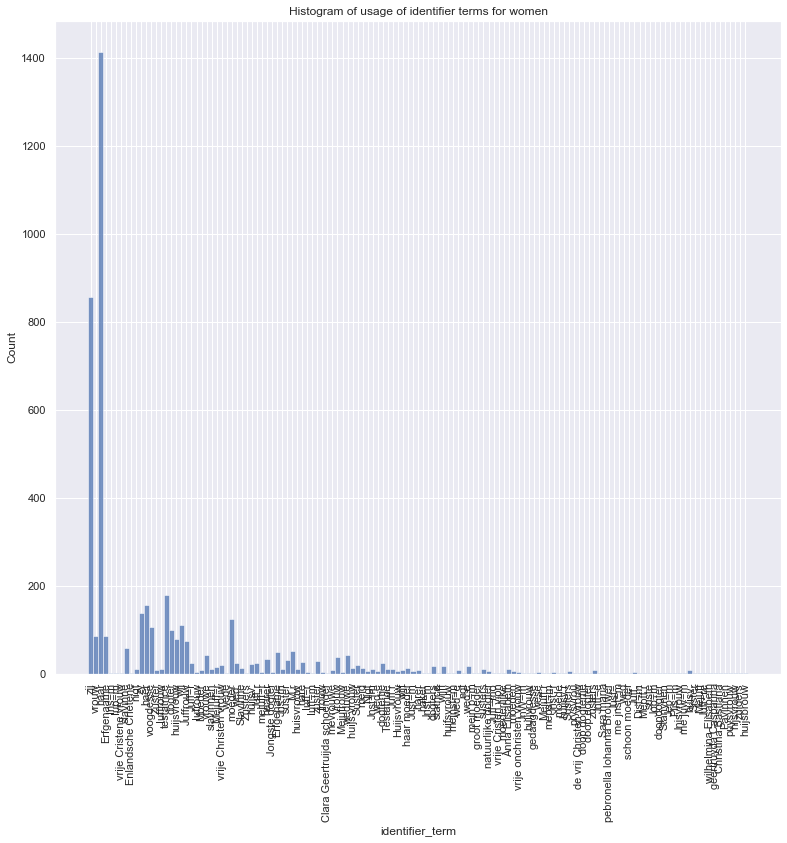

In [98]:
import seaborn as sns

g = sns.histplot(women_df, x="identifier_term")
sns.set(rc={'figure.figsize':(10, 8)})
plt.xticks(rotation=90)
plt.title("Histogram of usage of identifier terms for women") 


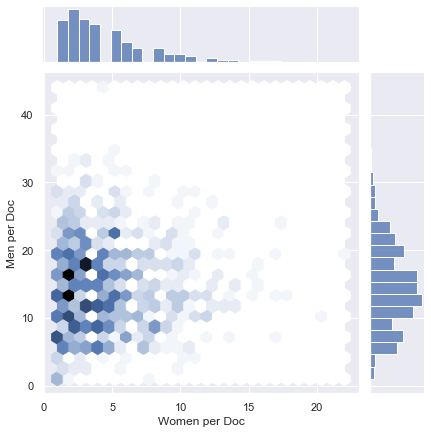

In [86]:
men_per_doc = men_df.groupby("filename").apply(lambda df: df.shape[0])
#women_per_doc = women_df.groupby("filename").apply(lambda df: df.shape[0])

sns.jointplot(x=women_per_doc, y=men_per_doc, kind="hex")
_ = plt.xlabel("Women per Doc")
_ = plt.ylabel("Men per Doc")

In [59]:
#for x in women_df.iterrows():
    #print(x[1].filename)
    #print("----")

### Statistics Indigenous

In [60]:
print("Percentage of docs with at least one mention of an indigenous person: ", indi_df.filename.unique().shape[0]/len(docs))
indi_per_doc = indi_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of indigenous peoples metions per document: ", indi_per_doc.mean(), indi_per_doc.var()**.5)

Percentage of docs with at least one mention of an indigenous person:  0.1746031746031746
Mean and std. dev. number of indigenous peoples metions per document:  1.6818181818181819 0.7162311170195087


Text(0.5, 1.0, 'Histogram of usage of identifier terms for indigenous people')

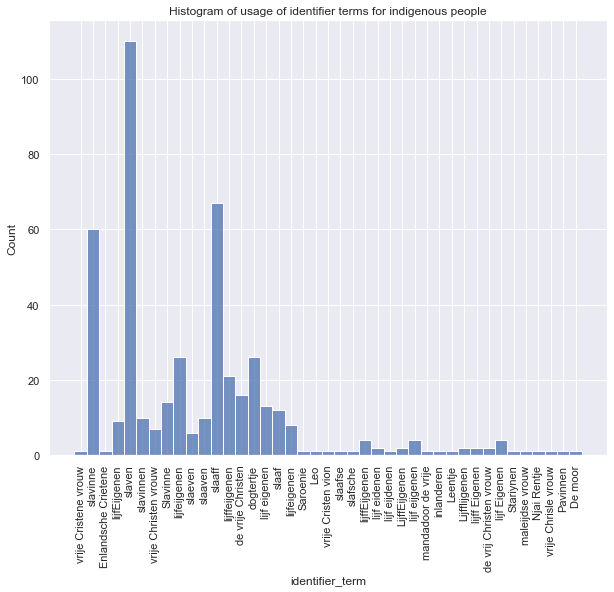

In [101]:
import seaborn as sns

g = sns.histplot(indi_df, x="identifier_term")
sns.set(rc={'figure.figsize':(10,8)})
plt.xticks(rotation=90)
plt.title("Histogram of usage of identifier terms for indigenous people") 
